In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def filter_data(data, k):
    return np.array([d for d in data if d < k])

In [30]:
def percentile(data, key=[50, 75, 90, 95, 97.5, 99, 99.9, 99.99, 99.999]):
    ret = {}
    for k in key:
        ret[k] = np.percentile(data, k)
    return ret

In [82]:
with open('ipc.dump', 'rb') as f:
    d1 = f.readlines()
    d1 = [d.decode('utf-8') for d in d1]
d1 = np.array(d1).astype(np.float32)
print(d1[:5])
#d1 = np.array(d1) / 1000000

[0.107254 0.054983 0.028734 0.052751 0.0404  ]


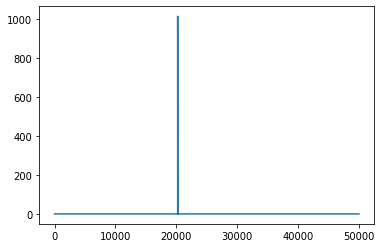

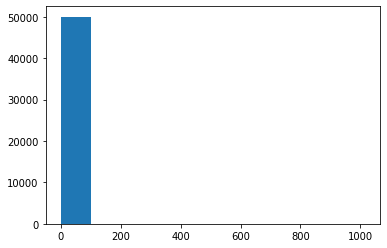

In [83]:
plt.plot(d1)
plt.show()
plt.hist(d1)
plt.show()

In [94]:

print(d1.min(), d1.max())
print(d1.mean())
print(percentile(d1))
print(percentile(d1,[99.5]))


0.014706 1016.08374
0.040290404
{50: 0.018115000799298286, 75: 0.019592250231653452, 90: 0.022374300286173817, 95: 0.02964805038645863, 97.5: 0.03306517368182541, 99: 0.045693128928542166, 99.9: 0.1343453900218025, 99.99: 0.1802533827677272, 99.999: 508.4137790866258}
{99.5: 0.06584762100130077}


In [95]:
d1_ = filter_data(list(d1), np.percentile(d1, 99.5))

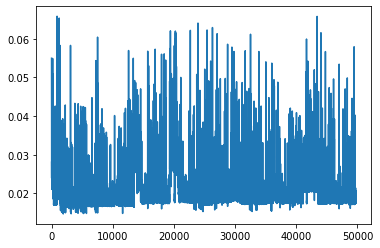

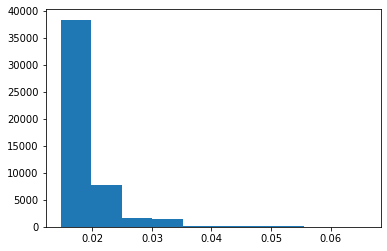

In [97]:
plt.plot(d1_)
plt.show()
plt.hist(d1_)
plt.show()

In [99]:
print(d1_.mean(), d1_.std())
print(d1_.min(), d1_.max())

0.019515183 0.004303672
0.014706 0.065843


In [100]:
with open('inc.dump', 'rb') as f:
    d2 = f.readlines()
    d2 = [d.decode('utf-8') for d in d2]
d2 = np.array(d2).astype(np.float32)
print(d2[:5])

[231.56529 230.82771 230.469   231.41249 230.63972]


In [101]:
d2.min()

-7572384400000.0

In [113]:
with open('inc2.dump', 'rb') as f:
    d3 = f.readlines()
    #print(d1[0])
    d3 = [d.decode('utf-8') for d in d3]
#d1 = np.array(d1).astype(np.float32)
#print(d3[:5])
print(d3[0].split(' '))
type = set([])
for dd in d3:
    type.add(dd.split(' ')[0])

#d1 = np.array(d1) / 1000000

['PING', '155.230.118.229', '(155.230.118.229)', '56(84)', 'bytes', 'of', 'data.\n']


In [114]:
for t in type:
    print(t)

PING
64


In [121]:
delay = []
for dd in d3:
    splited = dd.split(' ')
    if splited[0] != 'PING':
        delay.append(splited[6].split('=')[1])

In [136]:
delay = np.array(delay).astype(np.float32) / 2

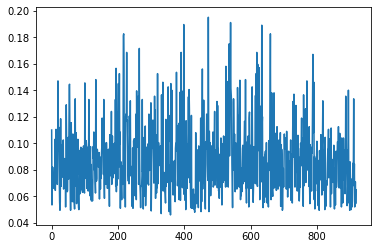

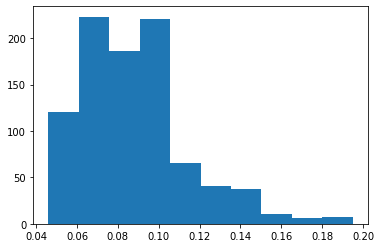

In [137]:
plt.plot(delay)
plt.show()
plt.hist(delay)
plt.show()

In [138]:
print(delay.mean(), delay.std())
print(delay.min(), delay.max())
print(percentile(delay))

0.08800163 0.026125675
0.046 0.195
{50: 0.08500000089406967, 75: 0.10050000250339508, 90: 0.12200000137090683, 95: 0.13957500606775283, 97.5: 0.15064999982714639, 99: 0.16850000619888306, 99.9: 0.19133199907839332, 99.99: 0.19463319347053742, 99.999: 0.19496331290975197}


In [139]:
delay = filter_data(delay, np.percentile(delay, 99))

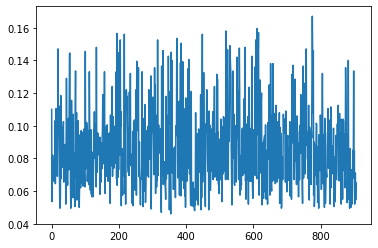

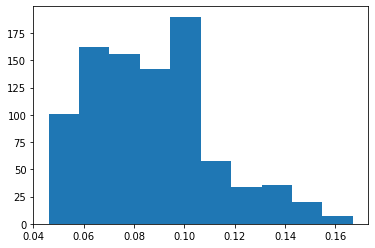

In [140]:
plt.plot(delay)
plt.show()
plt.hist(delay)
plt.show()

In [141]:
print(delay.mean(), delay.std())
print(delay.min(), delay.max())
print(percentile(delay))

0.086780354 0.024007479
0.046 0.167
{50: 0.08500000089406967, 75: 0.10000000149011612, 90: 0.1197499968111515, 95: 0.1354999989271164, 97.5: 0.14499999582767487, 99: 0.1525000035762787, 99.9: 0.16021250218153105, 99.99: 0.166321246355771, 99.999: 0.16693212077319536}


In [110]:
def ping(msg):
    pass

In [12]:
with open('inc2.dump', 'rb') as f:
    d3 = f.readlines()
    #print(d1[0])
    d3 = [d.decode('utf-8') for d in d3]
#d1 = np.array(d1).astype(np.float32)
#print(d3[:5])
print(d3[0].split(' '))
type = set([])
for dd in d3:
    type.add(dd.split(' ')[0])

delay = []
for dd in d3:
    splited = dd.split(' ')
    if splited[0] != 'PING':
        delay.append(dd.split(' ')[6].split('=')[1])
delay = np.array(delay).astype(np.float32)
#d1 = np.array(d1) / 1000000

['PING', '155.230.118.229', '(155.230.118.229)', '56(84)', 'bytes', 'of', 'data.\n']


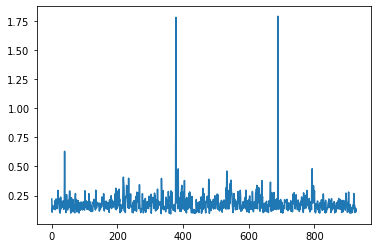

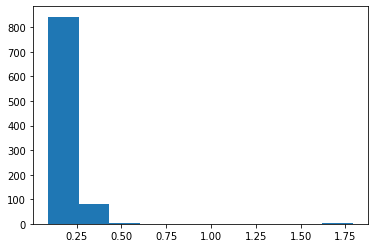

In [13]:
plt.plot(delay)
plt.show()
plt.hist(delay)
plt.show()

In [27]:
with open('ipc_100000.pkl', 'rb') as f:
    data = pkl.load(f)
#    d1 = f.readlines()
#    d1 = [d.decode('utf-8') for d in d1]
#d1 = np.array(d1).astype(np.float32)
#print(d1[:5])
#with open('interprocess22.pkl', 'rb') as f:
#    data = pkl.load(f)

In [28]:
data_ms = np.array(data) / 100000
#data /= 10**6
print(data_ms.mean(), data_ms.std())
print(len(data_ms))

1.7393454128 55.768582703739376
100000


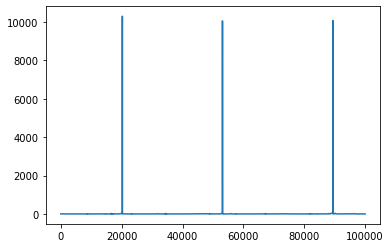

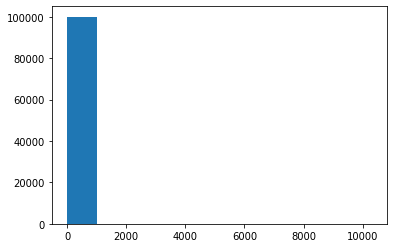

In [31]:
plt.plot(data_ms)
plt.show()
plt.hist(data_ms)
plt.show()

In [44]:
key = [k/10 for k in range(500, 1000, 5)]
print(key)
print(percentile(data_ms, key))
#filtered = filter_data(data_ms, percentile(data_ms, []))

[50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5, 83.0, 83.5, 84.0, 84.5, 85.0, 85.5, 86.0, 86.5, 87.0, 87.5, 88.0, 88.5, 89.0, 89.5, 90.0, 90.5, 91.0, 91.5, 92.0, 92.5, 93.0, 93.5, 94.0, 94.5, 95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0, 98.5, 99.0, 99.5]
{50.0: 0.229265, 50.5: 0.22939, 51.0: 0.22953, 51.5: 0.22964485, 52.0: 0.22979, 52.5: 0.22992, 53.0: 0.23005, 53.5: 0.23019, 54.0: 0.23033, 54.5: 0.23048, 55.0: 0.23064, 55.5: 0.2308, 56.0: 0.23095, 56.5: 0.2311, 57.0: 0.23126, 57.5: 0.23143, 58.0: 0.23162, 58.5: 0.23179, 59.0: 0.23199, 59.5: 0.23219, 60.0: 0.2324, 60.5: 0.23262, 61.0: 0.23285, 61.5: 0.23309, 62.0: 0.23335, 62.5: 0.23363, 63.0: 0

In [46]:
filtered_data_ms = filter_data(data_ms, np.percentile(data_ms,91.5))

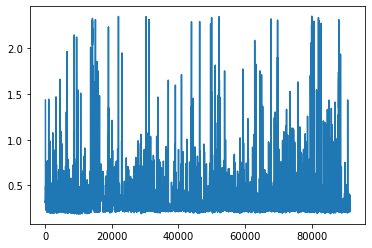

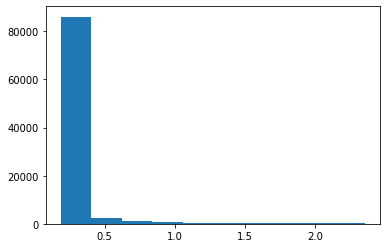

In [48]:
plt.plot(filtered_data_ms)
plt.show()
plt.hist(filtered_data_ms)
plt.show()

In [49]:
print(filtered_data_ms.mean(), filtered_data_ms.std())

0.27782670808743176 0.18646873825472665
